In [1]:
import hsfs

connection = hsfs.connection()
fs = connection.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.


In [2]:
?hsfs

Type:        module
String form: <module 'hsfs' from '/srv/hops/anaconda/envs/theenv/lib/python3.7/site-packages/hsfs/__init__.py'>
File:        /srv/hops/anaconda/envs/theenv/lib/python3.7/site-packages/hsfs/__init__.py
Docstring:   <no docstring>


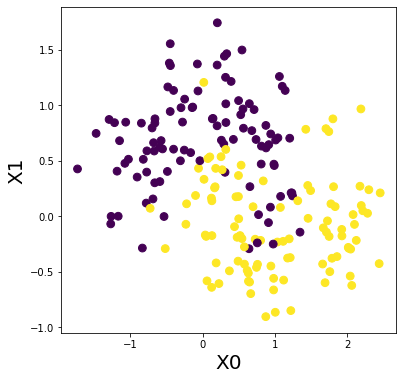

In [3]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
#
# 200 records with noise set as 0.3
#
X, y = datasets.make_moons(200, noise=0.3, random_state=42)
#
# Create the plot
#
fig, ax = plt.subplots(figsize=(6, 6))
plt.xlabel("X0", fontsize=20)
plt.ylabel("X1", fontsize=20)
plt.scatter(X[:,0], X[:,1], s=60, c=y)

In [4]:
X.shape

(200, 2)

In [5]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1])

In [6]:
moon_x0 = X[:, 0]
moon_x0.shape

(200,)

In [7]:
moon_x1 = X[:, 1]
moon_x1.shape

(200,)

In [8]:
moon_id = list(range(0, 200))

In [9]:
len(moon_id)

200

In [10]:
import pandas as pd

In [11]:
moon_train = pd.DataFrame({"moon_x0": moon_x0, "moon_x1": moon_x1, "moon_id": moon_id})

In [12]:
moon_label = pd.DataFrame({"moon_id": moon_id, "moon_label": y})

In [13]:
f_train = fs.create_feature_group("moon_train",
                        version=1,
                        description="Moon train features",
                        primary_key=["moon_id"],
                        online_enabled=False)

In [14]:
f_train.save(moon_train)

Configuring ingestion job...
Uploading Pandas dataframe...
Launching ingestion job...
Ingestion Job started successfully, you can follow the progress at https://hopsworks.glassfish.service.consul:8182/hopsworks/#!/project/388/jobs


In [15]:
f_label = fs.create_feature_group("moon_label",
                        version=1,
                        description="Moon train features",
                        primary_key=["moon_id"],
                        online_enabled=False)

In [16]:
f_label.save(moon_label)

Configuring ingestion job...
Uploading Pandas dataframe...
Launching ingestion job...
Ingestion Job started successfully, you can follow the progress at https://hopsworks.glassfish.service.consul:8182/hopsworks/#!/project/388/jobs
